2020-05-09 07:23:49 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2020-05-09 07:23:49 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2020-05-09 07:23:49 WARNING: /home/jovyan/SpeechRecognition/reports has 14 old reports that have not been closed
2020-05-09 07:23:49 WARNING: /home/jovyan/SpeechRecognition/application_generated_data_files has 14 old reports that have not been closed
2020-05-09 07:23:49 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2020-05-09 07:23:49 INFO: Setting time sca

['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


2020-05-09 07:23:53 INFO: Time 0:00:03.617319 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-05-09 07:24:02 INFO: Time 0:00:09.517738 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2020-05-09 07:24:08 INFO: Time 0:00:05.757001 taken by PartitionAndPlacePartitioner
Created spalloc job 5352448
2020-05-09 07:24:08 INFO: Created spalloc job 5352448
Waiting for board power commands to complete.
2020-05-09 07:24:08 INFO: Waiting for board power commands to complete.
2020-05-09 07:24:13 INFO: Time 0:00:05.050085 taken by SpallocAllocator
2020-05-09 07:24:13 INFO: Creating transceiver for 10.11.196.81
2020-05-09 07:24:13 INFO: Working out if machine is booted
2020-05-09 07:24:17 INFO: Attempting to

<IPython.core.display.Javascript object>


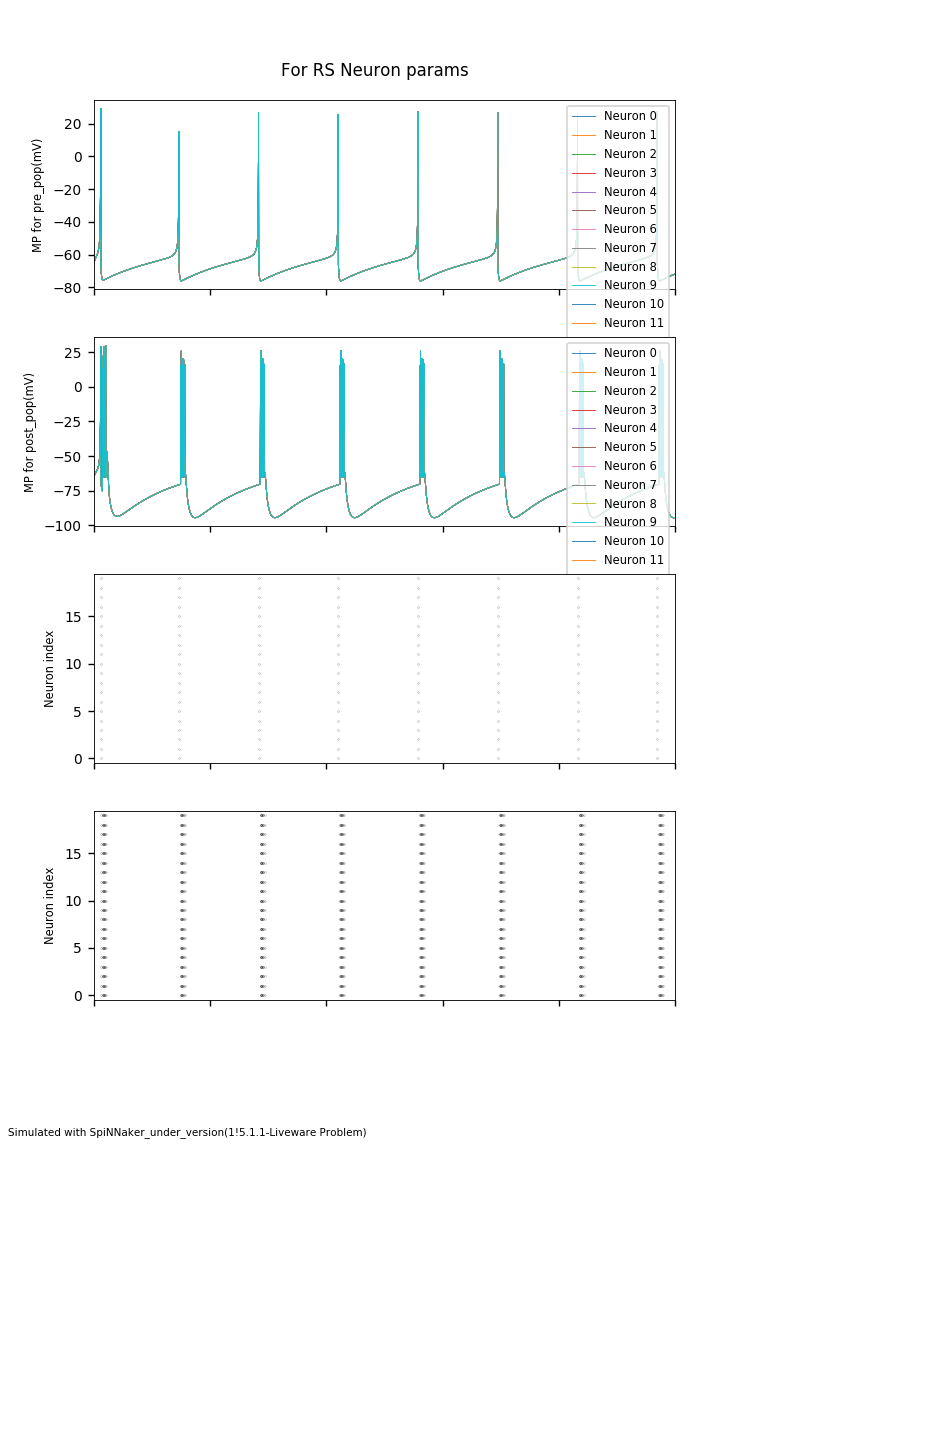

In [6]:
try:
    import pyNN.spiNNaker as sim
except Exception as e:
    import synnaker8 as sim
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt
import pyNN.utility.plotting as plot
import random

#spynnaker setup
sim.setup(timestep=0.1, min_delay=1.0)



model = sim.extra_models.Izhikevich_cond


snr_a=0.02 #0.005 #0.1
snr_b=0.2 #0.32
snr_c=-65 #-65
snr_d=8 #2
snr_v_init = -65 #-70
snr_u_init = snr_b * snr_v_init

tau_ampa = 6###excitatory synapse time constant
tau_gabaa= 4### inhibitory synapse time constant
E_ampa = 0.0
E_gabaa = -80.0
current_bias = 4.0
cell_params = {'a': snr_a, 'b': snr_b, 'c': snr_c, 'd': snr_d,
                   'v': snr_v_init, 'u': snr_u_init,
                   'tau_syn_E': tau_ampa, 'tau_syn_I': tau_gabaa,
                   'i_offset': current_bias,
                   'e_rev_E': E_ampa, 'e_rev_I': E_gabaa,
                   }
                   

pop_size = 20

simtime = 1000

pre_pop = sim.Population(pop_size, model(**cell_params))
post_pop = sim.Population(pop_size, model(**cell_params))


wiring = sim.OneToOneConnector()
static_synapse = sim.StaticSynapse(weight=random.uniform(1.0,5.0), delay=3.0)
connections = sim.Projection(pre_pop, post_pop, wiring, static_synapse)

#record data
pre_pop.record(['v', 'spikes'])
post_pop.record(['v', 'spikes'])

#start simulation
sim.run(simtime)

# print("Weights:{}".format(plastic_projection.get('weight', 'list')))

#get data in neo format
neo_pre_spikes = pre_pop.get_data(variables = ['spikes','v'])
neo_post_spikes = post_pop.get_data(variables = ['spikes','v'])

#spiketrains
pre_pop_spikes = neo_pre_spikes.segments[0].spiketrains
post_pop_spikes = neo_post_spikes.segments[0].spiketrains

#membrane potential
pre_pop_v = neo_pre_spikes.segments[0].filter(name='v')[0]
post_pop_v = neo_post_spikes.segments[0].filter(name='v')[0]

#end simulation
sim.end()

# print("Weights:{}".format(connections.get('weight', 'list')))

# Plot
plot.Figure(
    # plot voltage(pre_pop) for first ([0]) neuron
    plot.Panel(pre_pop_v, ylabel="MP for pre_pop(mV)",
               yticks=True, markersize=0.2, xlim=(0, simtime)),
    # plot voltage(post_pop) for first ([0]) neuron
    plot.Panel(post_pop_v, ylabel="MP for post_pop(mV)",
              yticks=True, markersize=0.2, xlim=(0, simtime)),
    # plot spikes(pre_pop) (or in this case spike)
    plot.Panel(pre_pop_spikes, yticks=True, markersize=0.2, xlim=(0, simtime)),
    # plot spikes(post_pop) (or in this case spike)
    plot.Panel(post_pop_spikes, yticks=True, markersize=0.2, xlim=(0, simtime)),
    title="For RS Neuron params",
    annotations="Simulated with {}".format(sim.name())).save('Pre-Post-test-static-1.0-5.0.png')
plt.show()
# Figure(Panel(pre_spikes.segments[0].spiketrains, yticks=True, markersize=0.2, xlim=(0,simtime)), Panel(post_spikes.segments[0].spiketrains, yticks=True, markersize=0.2, xlim=(0,simtime)), title="stdp example", annotations="simulated with {}".format(sim.name())).save('testSpiketrains.png')


2020-05-09 06:58:59 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2020-05-09 06:58:59 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2020-05-09 06:58:59 WARNING: /home/jovyan/SpeechRecognition/reports has 14 old reports that have not been closed
2020-05-09 06:58:59 WARNING: /home/jovyan/SpeechRecognition/application_generated_data_files has 14 old reports that have not been closed
2020-05-09 06:58:59 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2020-05-09 06:58:59 INFO: Setting time sca

['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


2020-05-09 06:59:02 INFO: Time 0:00:03.673817 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-05-09 06:59:12 INFO: Time 0:00:09.896499 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2020-05-09 06:59:18 INFO: Time 0:00:05.808517 taken by PartitionAndPlacePartitioner
Created spalloc job 5352440
2020-05-09 06:59:18 INFO: Created spalloc job 5352440
Waiting for board power commands to complete.
2020-05-09 06:59:18 INFO: Waiting for board power commands to complete.
2020-05-09 06:59:23 INFO: Time 0:00:05.046383 taken by SpallocAllocator
2020-05-09 06:59:23 INFO: Creating transceiver for 10.11.196.81
2020-05-09 06:59:23 INFO: Working out if machine is booted
2020-05-09 06:59:27 INFO: Attempting to